In [ ]:
# conda create -n py3.11_analytics python=3.11 anaconda

In [ ]:
# !pip install ipython-sql sqlalchemy
# !pip install sqlalchemy
# !pip install pyodbc
# !pip install pandasql
# !pip install ydata_profiling

In [2]:
import urllib

In [3]:
dialect = "mssql"
driver = "pyodbc"
# username = "sa"
# password = "password"
host = "localhost"
port = "1433"
database = "jobs_nyc_postings"
driver_mssql = "ODBC+Driver+17+for+SQL+Server"

# SQL Authentication
# conn_str = f"{dialect}+{driver}://{username}:{password}@{host}:{port}/{database}?driver={driver_mssql}"

# Windows Authentication
conn_str = f"{dialect}+{driver}://{host}/{database}?driver={driver_mssql}"
print(conn_str)

mssql+pyodbc://localhost/jobs_nyc_postings?driver=ODBC+Driver+17+for+SQL+Server


In [4]:
%load_ext sql
%sql "mssql+pyodbc://localhost/jobs_nyc_postings?driver=ODBC+Driver+17+for+SQL+Server"

In [5]:
result = %sql select * from df_jd
df_jd = result.DataFrame()
df_jd[0:1]

 * mssql+pyodbc://localhost/jobs_nyc_postings?driver=ODBC+Driver+17+for+SQL+Server
Done.


,job_id,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,606346,DEPARTMENT FOR THE AGING,External,1,Business Operations Analyst,ASSOCIATE STAFF ANALYST,Competitive-1,12627,00,"Administration & Human Resources Technology, D...",...,None,Please be sure to submit a resume & cover lett...,None,None,None,New York City residency is generally required ...,09/28/2023,27-DEC-2023,09/29/2023,11/20/2023


In [9]:
df_jd['# Of Positions'] = df_jd['# Of Positions'].astype(int)
df_jd['Salary Range From'] = df_jd['Salary Range From'].astype(float)
df_jd['Salary Range To'] = df_jd['Salary Range To'].astype(float)

In [10]:
print(df_jd.shape)
df_jd.dtypes

(3154, 30)


job_id                            object
Agency                            object
Posting Type                      object
# Of Positions                     int32
Business Title                    object
Civil Service Title               object
Title Classification              object
Title Code No                     object
Level                             object
Job Category                      object
Full-Time/Part-Time indicator     object
Career Level                      object
Salary Range From                float64
Salary Range To                  float64
Salary Frequency                  object
Work Location                     object
Division/Work Unit                object
Job Description                   object
Minimum Qual Requirements         object
Preferred Skills                  object
Additional Information            object
To Apply                          object
Hours/Shift                       object
Work Location 1                   object
Recruitment Cont

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Assuming you have a DataFrame named df
selected_columns = df_jd[['# Of Positions', 'Salary Range From', 'Salary Range To']]
selected_columns = selected_columns.fillna(0)

In [16]:
correlation_matrix = selected_columns.corr()
correlation_matrix

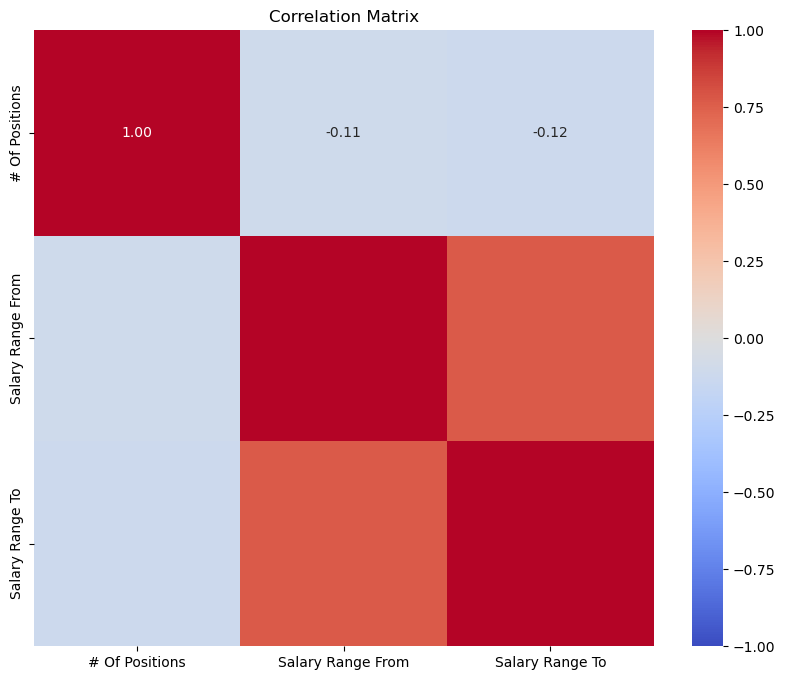

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

c:\Users\ACKI82\anaconda3\envs\py3.11_analytics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ACKI82\anaconda3\envs\py3.11_analytics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ACKI82\anaconda3\envs\py3.11_analytics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


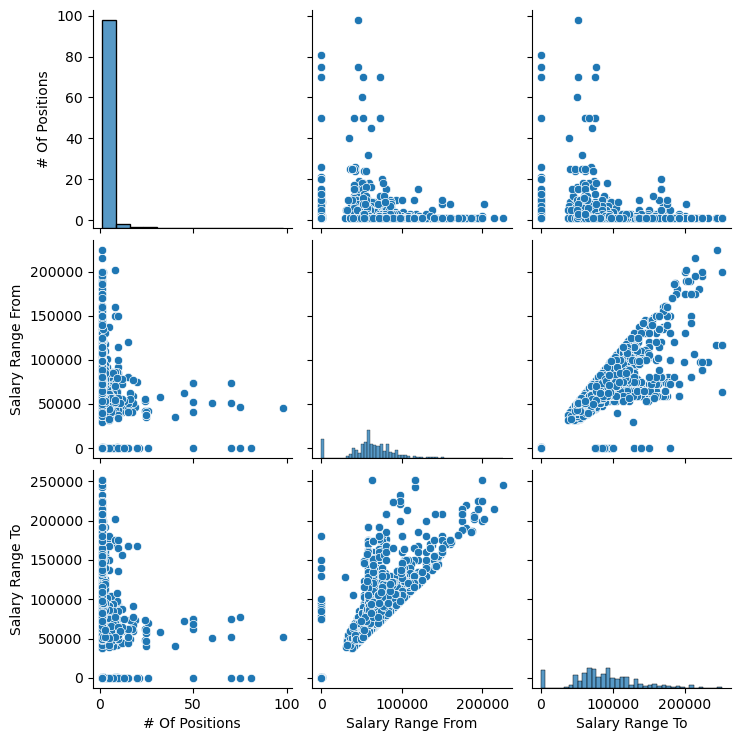

In [20]:
sns.pairplot(selected_columns)
plt.show()